# Chapter 3: Classification with MNIST

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X = mnist['data']

Y = mnist['target']

In [3]:
X.shape

(70000, 784)

In [4]:
Y.shape

(70000,)

### Existem 7 mil imagens com 784 atributos cada. Cada imagem possui dimensões de 28x28 = 784.

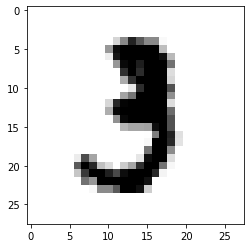

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

imagem = X[10].reshape(28,28)

plt.imshow(imagem, cmap=mpl.cm.binary, interpolation='nearest')
plt.show()

In [6]:
Y[10]

'3'

In [7]:
Y=Y.astype(np.uint8)

In [8]:
Y[10]

3

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X[:3000,:],Y[:3000],test_size=0.33,shuffle=True)

In [10]:
y_test[10]

9

In [11]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()

sgd.fit(x_train, y_train)

sgd.predict(x_test)

array([0, 3, 1, 6, 0, 1, 7, 2, 9, 1, 9, 7, 0, 6, 9, 5, 6, 3, 7, 8, 9, 8,
       7, 5, 4, 1, 7, 1, 7, 8, 8, 9, 1, 2, 6, 8, 5, 1, 5, 8, 6, 1, 9, 9,
       6, 6, 0, 4, 0, 7, 7, 1, 9, 4, 4, 3, 6, 5, 9, 0, 8, 5, 9, 3, 2, 9,
       6, 8, 5, 7, 4, 5, 1, 4, 7, 9, 8, 1, 6, 5, 3, 4, 3, 0, 7, 2, 4, 2,
       2, 6, 7, 2, 1, 6, 1, 6, 5, 1, 5, 7, 4, 8, 8, 2, 0, 8, 4, 7, 0, 9,
       4, 7, 2, 5, 6, 5, 1, 6, 7, 7, 0, 7, 7, 4, 7, 9, 7, 2, 5, 1, 9, 4,
       4, 6, 7, 3, 5, 0, 5, 6, 3, 1, 2, 4, 3, 2, 1, 0, 3, 2, 0, 4, 2, 4,
       0, 8, 1, 0, 0, 6, 1, 6, 7, 1, 4, 5, 3, 4, 4, 7, 7, 3, 0, 7, 2, 7,
       3, 3, 3, 6, 2, 2, 3, 2, 8, 3, 0, 1, 4, 7, 6, 9, 8, 0, 4, 5, 8, 2,
       0, 1, 3, 0, 4, 9, 7, 7, 8, 0, 5, 6, 6, 4, 7, 0, 2, 1, 1, 1, 9, 5,
       1, 0, 3, 9, 2, 7, 9, 9, 3, 3, 3, 9, 1, 7, 7, 5, 4, 9, 6, 8, 7, 8,
       6, 4, 9, 9, 9, 8, 7, 5, 1, 0, 2, 8, 8, 9, 2, 0, 4, 6, 2, 3, 7, 7,
       5, 5, 1, 2, 7, 4, 1, 7, 9, 7, 1, 5, 7, 0, 1, 9, 0, 9, 1, 2, 8, 8,
       5, 2, 1, 6, 3, 5, 1, 3, 0, 3, 3, 6, 1, 2, 5,

In [12]:
y_test

array([0, 3, 1, 6, 0, 1, 7, 1, 9, 1, 9, 7, 0, 6, 9, 5, 6, 5, 9, 8, 9, 8,
       7, 5, 4, 1, 7, 1, 7, 8, 8, 9, 1, 2, 6, 8, 5, 1, 5, 8, 6, 1, 4, 8,
       6, 6, 0, 4, 0, 7, 7, 1, 9, 3, 3, 3, 6, 5, 9, 0, 8, 5, 9, 3, 2, 9,
       6, 8, 5, 2, 4, 5, 1, 4, 7, 9, 8, 1, 6, 5, 5, 0, 3, 0, 7, 4, 4, 2,
       2, 6, 9, 2, 1, 6, 1, 6, 1, 1, 5, 7, 4, 8, 8, 2, 0, 2, 4, 7, 0, 9,
       4, 9, 2, 5, 6, 1, 1, 6, 7, 7, 0, 7, 7, 4, 7, 5, 7, 8, 5, 1, 9, 4,
       4, 6, 9, 3, 5, 0, 5, 6, 3, 1, 2, 4, 3, 2, 1, 0, 3, 9, 0, 4, 2, 4,
       0, 8, 1, 0, 0, 6, 1, 6, 7, 1, 4, 5, 3, 9, 4, 7, 7, 3, 5, 7, 2, 7,
       5, 3, 3, 6, 2, 2, 5, 2, 2, 3, 0, 1, 4, 7, 6, 4, 8, 0, 4, 3, 5, 2,
       0, 8, 3, 6, 9, 7, 8, 9, 8, 0, 5, 6, 6, 7, 6, 0, 2, 1, 1, 1, 9, 5,
       1, 0, 3, 9, 2, 7, 9, 9, 3, 3, 3, 4, 1, 7, 7, 5, 4, 9, 6, 8, 7, 8,
       6, 4, 9, 9, 6, 8, 7, 5, 6, 0, 2, 8, 8, 9, 7, 8, 9, 6, 2, 3, 7, 7,
       5, 5, 1, 2, 7, 4, 1, 7, 9, 7, 1, 5, 7, 0, 1, 9, 0, 9, 1, 2, 8, 1,
       1, 2, 1, 6, 4, 5, 1, 3, 9, 3, 5, 6, 1, 2, 5,

In [13]:
# implementação da validação cruzada na mão

from sklearn.model_selection import StratifiedKFold

from sklearn.base import clone



sk = StratifiedKFold(n_splits=3, random_state=42,shuffle=True)


for train_index, test_index in sk.split(x_train,y_train):
    
    clone_clf = clone(sgd)
    
    x_train_folds = x_train[train_index]
    
    y_train_folds = y_train[train_index]
    
    x_test_fold = x_train[test_index]
    
    y_test_fold = y_train[test_index]
    
    clone_clf.fit(x_train_folds,y_train_folds)
    
    y_pred = clone_clf.predict(x_test_fold)
    
    n_correct = sum(y_pred == y_test_fold)
    
    print(n_correct/len(y_pred))

0.8597014925373134
0.8552238805970149
0.835820895522388


In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd, x_train, y_train, cv=3, scoring = 'accuracy')


# cv pode ser sk

array([0.83432836, 0.84925373, 0.87313433])

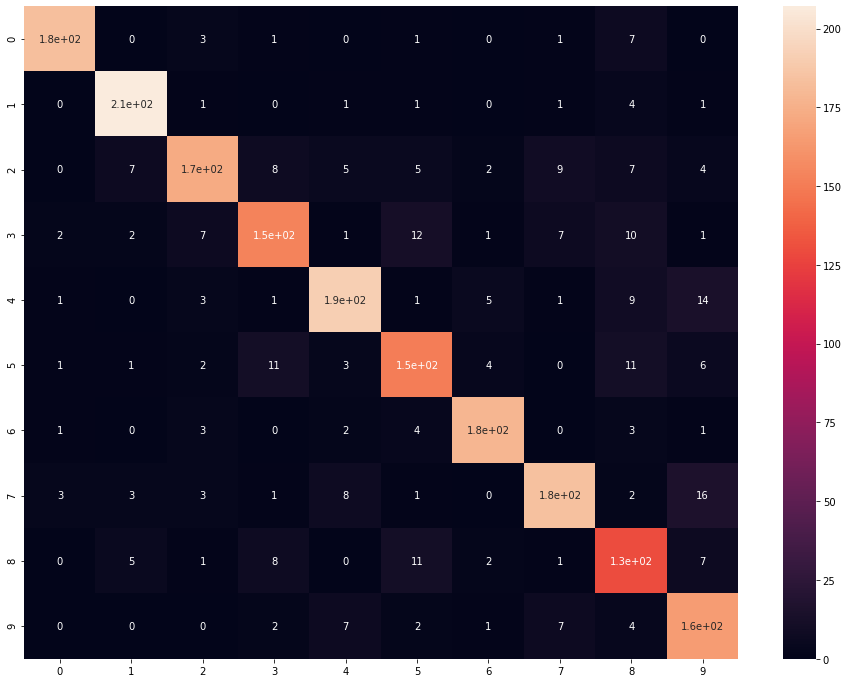

In [15]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd, x_train, y_train, cv = 3)

from sklearn.metrics import confusion_matrix


plt.figure(figsize=(16,12))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True)



In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_train,y_train_pred, average='macro'))

print(recall_score(y_train,y_train_pred, average='macro'))

print(f1_score(y_train,y_train_pred, average='macro'))


0.8519830593108789
0.8524053150651347
0.8510608554247607


In [17]:
y_train_5 = (y_train == 5)

y_test_5 = (y_test == 5)

y_scores = cross_val_predict(sgd, x_train, y_train_5, cv=5, method='decision_function')

In [18]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


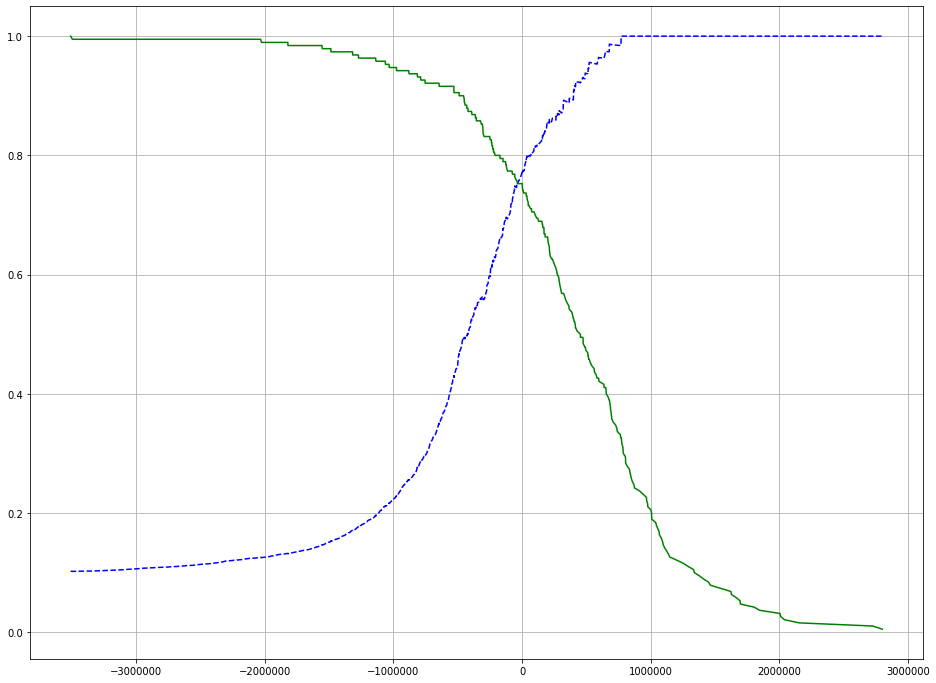

In [19]:
def plot_precision_recall_curve(precision,recall,thresholds):
    
    plt.figure(figsize=(16,12))
    plt.plot(thresholds, precisions[:-1], 'b--',label= 'Precision')
    plt.plot(thresholds, recall[:-1],'g-', label='Recall')
    plt.grid()
    
plot_precision_recall_curve(precisions, recalls, thresholds)
plt.show()


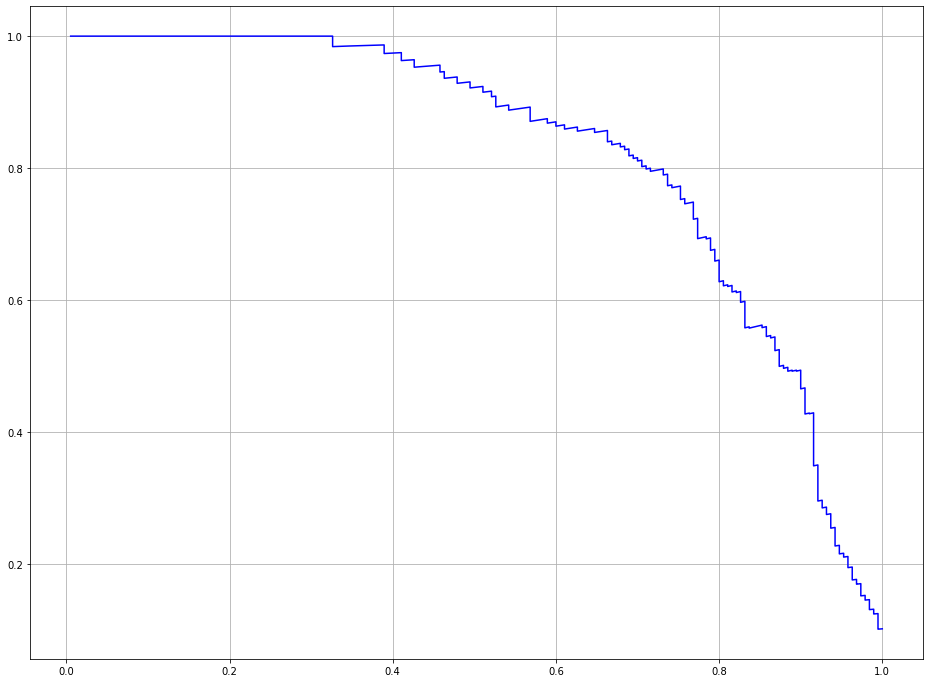

In [20]:
plt.figure(figsize=(16,12))
plt.plot(recalls[:-1], precisions[:-1], 'b-')

plt.grid()
    

In [21]:
thresholds_choosed =  thresholds[np.argmax(precisions>=0.80)]

In [22]:
y_train_pred_80 = y_scores >= thresholds_choosed

In [23]:
precision_score(y_train_5, y_train_pred_80)

0.8

In [24]:
recall_score(y_train_5, y_train_pred_80)

0.7157894736842105

In [25]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

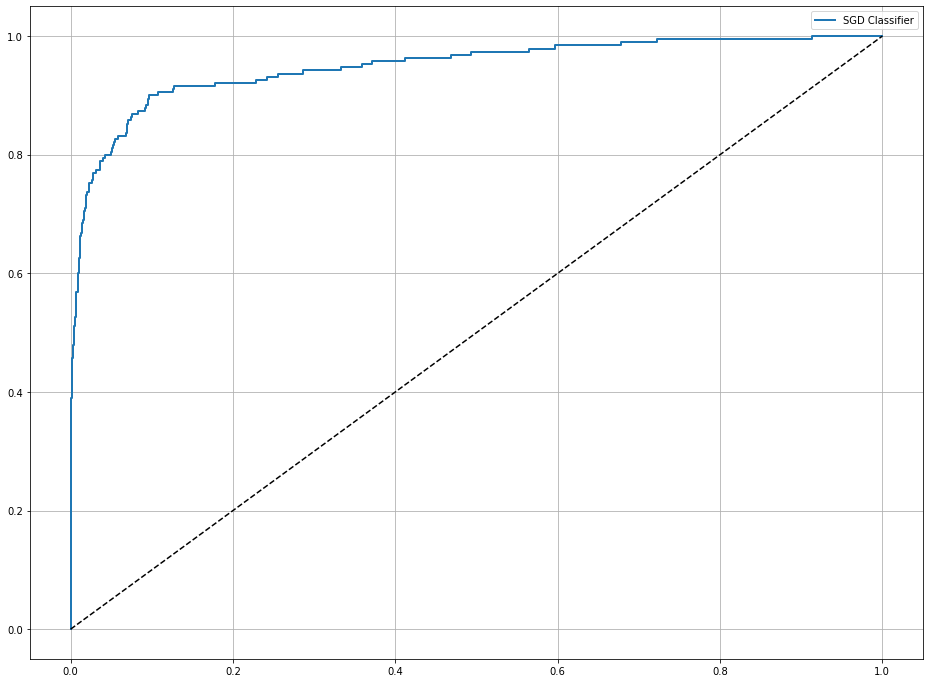

In [26]:
plt.figure(figsize=(16,12))

def plota_roc(fpr,tpr,label=None):

    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0, 1], [0, 1],'k--')
    plt.grid()
    plt.legend()
    
plota_roc(fpr,tpr, 'SGD Classifier')

plt.show()

In [27]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)


0.9486524002313477

In [28]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=5, method='predict_proba')

In [29]:
y_scores_forest = y_probas_forest[:,1]

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

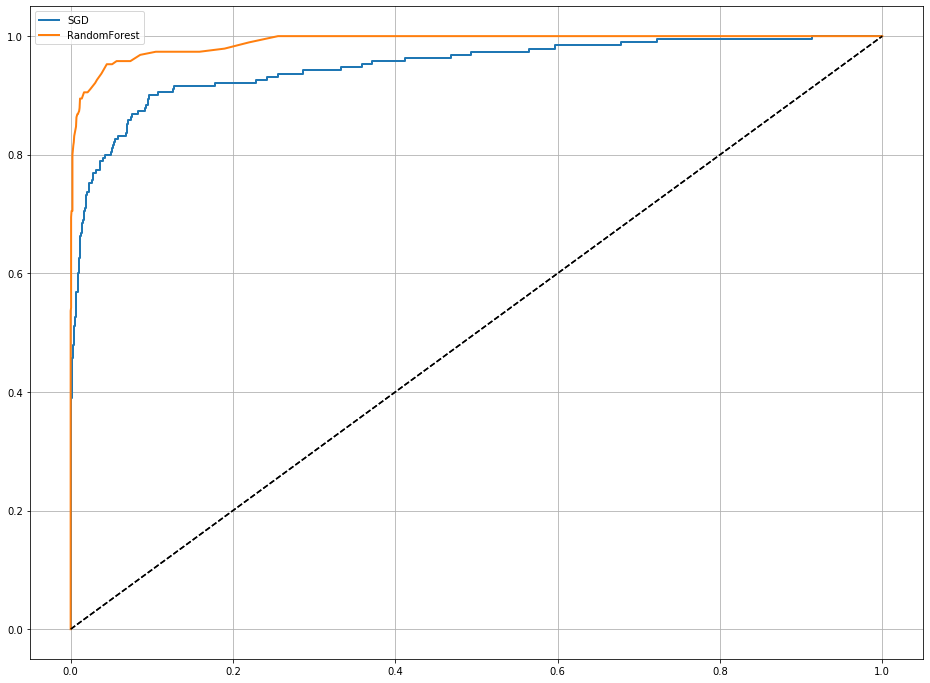

In [30]:
plt.figure(figsize=(16,12))
plota_roc(fpr,tpr,'SGD')
plota_roc(fpr_forest,tpr_forest,'RandomForest')
plt.grid()

In [31]:
roc_auc_score(y_train_5,y_scores_forest)


0.9901257952573742

### Classificação Multiclasse

In [32]:
sgd.fit(x_train,y_train)

sgd.predict(x_test[[20]])

array([9], dtype=uint8)

In [33]:
y_test[20]

9

In [34]:
scores = sgd.decision_function(x_test[[34]])

In [35]:
sgd.classes_[np.argmax(scores).ravel()]

array([6], dtype=uint8)

In [36]:
y_test[34]

6

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

y_train_pred = cross_val_predict(sgd,x_train,y_train)

conf_mx = confusion_matrix(y_train,y_train_pred)

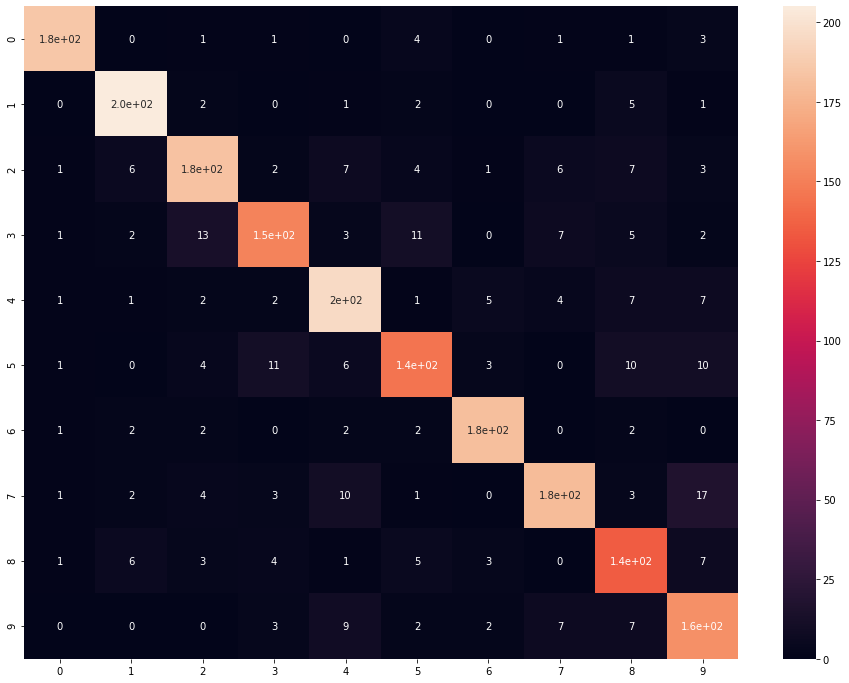

In [38]:
plt.figure(figsize=(16,12))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True)

### Análise de Erro

In [39]:
row_sums = conf_mx.sum(axis=1,keepdims=True)

norm_conf_mx = conf_mx/row_sums

In [40]:
np.fill_diagonal(norm_conf_mx,0)

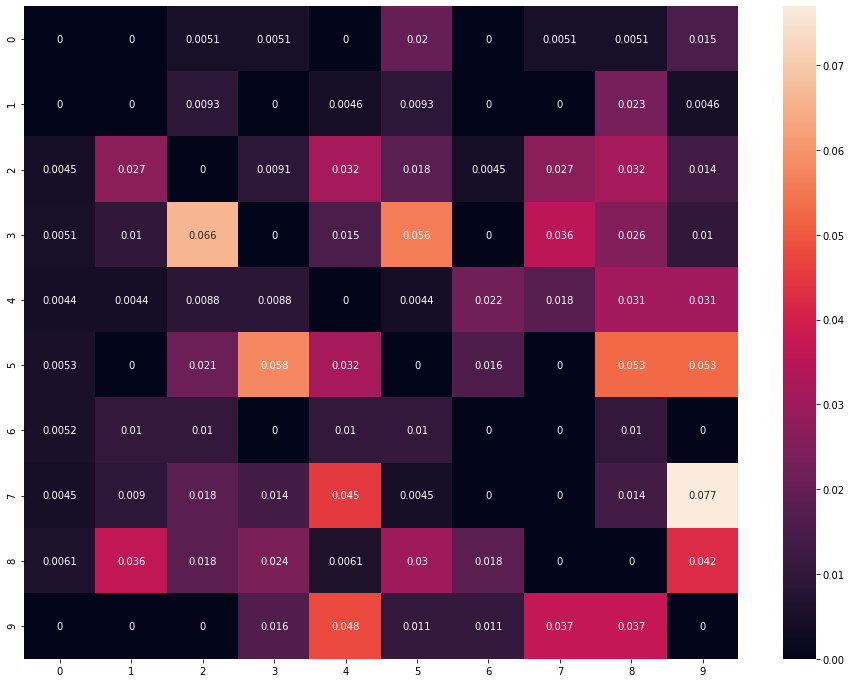

In [41]:
plt.figure(figsize=(16,12))

sns.heatmap(norm_conf_mx, annot=True)

In [42]:
### Classificação Multilabel

from sklearn.neighbors import KNeighborsClassifier

y_train_large = y_train>=7

y_train_odd = (y_train % 2 == 1)

y_multilabel = np.c_[y_train_large,y_train_odd]


knn_clf = KNeighborsClassifier()

knn_clf.fit(x_train, y_multilabel)



KNeighborsClassifier()

In [43]:
y_multilabel

array([[False, False],
       [False, False],
       [ True, False],
       ...,
       [False, False],
       [False, False],
       [ True,  True]])

In [44]:
knn_clf.predict(x_test[[15]])

array([[False,  True]])

In [45]:
y_test[15]

5

In [46]:
y_train_knn_pred = cross_val_predict(knn_clf,x_train,y_multilabel,cv=5)


In [47]:
f1_score(y_multilabel,y_train_knn_pred, average='weighted')

0.93195084815313

In [48]:
noise = np.random.randint(0,100,(len(x_train),784))

x_train_mod = x_train + noise

noise = np.random.randint(0,100,(len(x_test),784))

x_test_mod = x_test + noise

y_train_mod = x_train

y_test_mod = x_test



knn_clf.fit(x_train_mod,y_train_mod)


clean_digit = knn_clf.predict([x_test_mod[14]])

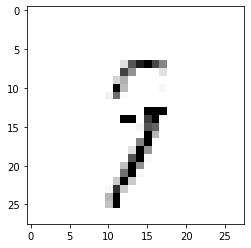

In [49]:
imagem = clean_digit.reshape(28,28)

plt.imshow(imagem, cmap=mpl.cm.binary, interpolation='nearest')
plt.show()

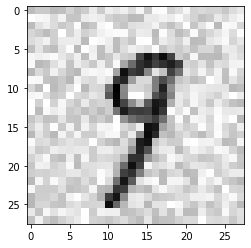

In [50]:
imagem = x_test_mod[14].reshape(28,28)

plt.imshow(imagem, cmap=mpl.cm.binary, interpolation='nearest')
plt.show()

# Exercício 1:

In [51]:
grid_param = {
    
    'n_neighbors': [3, 5, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan', 'euclidean']
            }


scaler = StandardScaler()

X_scaled = scaler.fit_transform(X.astype(np.float64))

x_train, x_test, y_train, y_test = train_test_split(X[:4000],Y[:4000],test_size=0.33,shuffle=True)


In [52]:
from sklearn.model_selection import GridSearchCV

otimizador = GridSearchCV(knn_clf, grid_param, cv=3, verbose=2, n_jobs = 1, scoring='accuracy')



resultados = otimizador.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] metric=manhattan, n_neighbors=3, weights=uniform ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . metric=manhattan, n_neighbors=3, weights=uniform, total=   2.3s
[CV] metric=manhattan, n_neighbors=3, weights=uniform ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] . metric=manhattan, n_neighbors=3, weights=uniform, total=   2.8s
[CV] metric=manhattan, n_neighbors=3, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=3, weights=uniform, total=   2.8s
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, total=   2.6s
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, total=   2.8s
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, total=   3.0s
[CV] metric=manhattan, n_neighbors=5, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=5, weights=uniform, total=   3.7s
[CV] metric=manhattan, n_neighbors=5, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=5, weights=uniform, total=   2.8s
[CV] metric=manhattan, n_neighbors=5, weights=uniform ................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  1.4min finished


In [53]:
resultados.best_estimator_

KNeighborsClassifier(metric='euclidean', weights='distance')

In [54]:
resultados.best_score_

0.9138051110927398